# Overview

This notebook demonstrates how to calculate and update the Matrix Profile for a sample dataset (this is the same example signal used in https://github.com/aouyang1/go-matrixprofile)

# Load Libraries

In [1]:
from matrixprofile import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load and visualize sample data

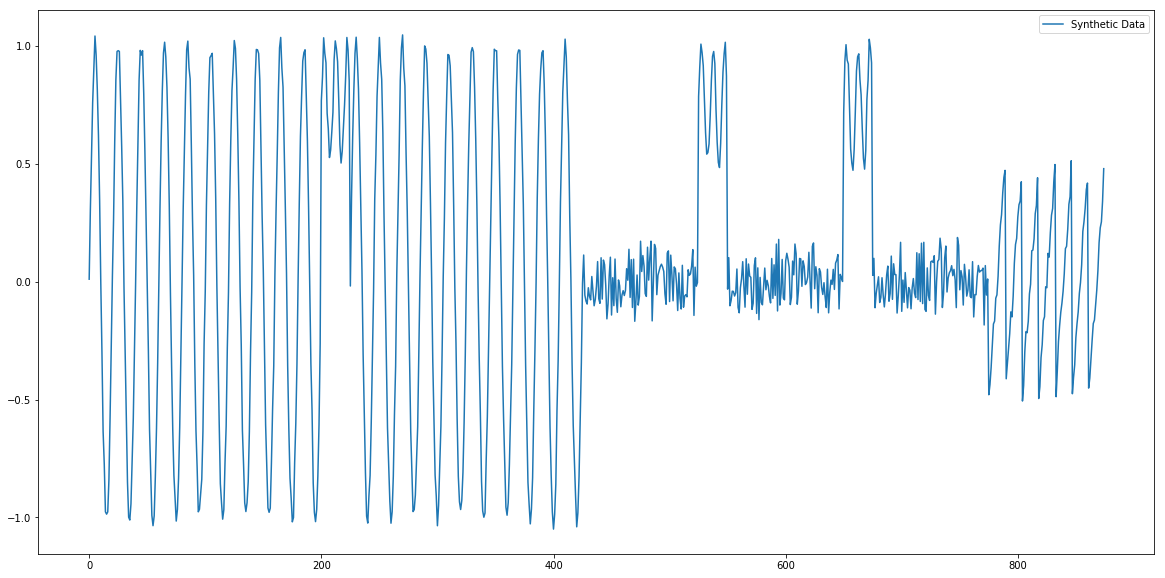

In [2]:
data = pd.read_csv('rawdata.csv')
pattern = data.data.values

#Plot data
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
legend = ax1.legend(loc='upper right')

# Calculate the Matrix Profile

In [3]:
m = 32
mp = matrixProfile.stomp(pattern,m)

Text(0.5,0,'Sample')

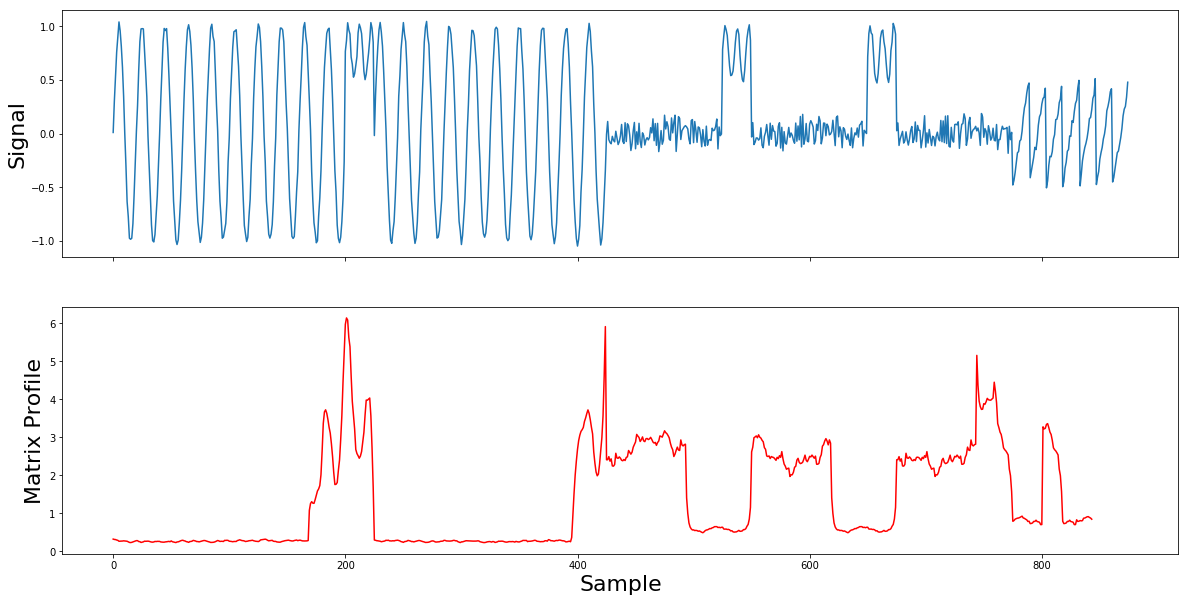

In [4]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

There are several items of note:

- The Matrix Profile value jumps at each phase change. High Matrix Profile values are associated with 'discords': time series behavior that hasn't been observed before.

- Repeated patterns in the data (or 'motifs') lead to low Matrix Profile values.

# STAMPI: sequentially update the Matrix Profile

We can introduce an anomaly to the end of the time series and use STAMPI to detect it

In [5]:
#Add 2.0 to the end of the pattern
pattern_new = np.append(pattern,2.0)

#Update the Matrix Profile
mp_new = matrixProfile.stampi_update(pattern,m,mp[0],mp[1],newval=2.0)

Text(0,0.5,'Matrix Profile')

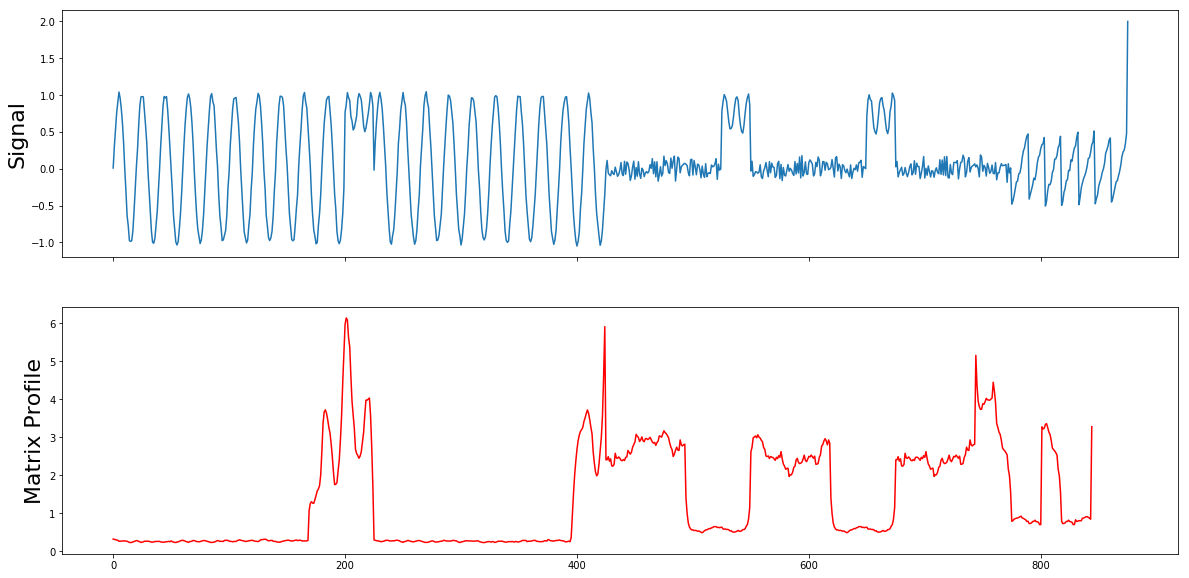

In [6]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp_new[0],np.zeros(m-1)+np.nan)

#Plot the data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern_new)),pattern_new, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot data
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile",color='red')
ax2.set_ylabel('Matrix Profile', size=22)